In [1]:
import pandas as pd
import numpy as np

import joblib

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

seed = 42

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')

y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712, 1), (179, 1))

# Train the model

In [3]:
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

/Users/yaheaal/Desktop/deploying-machine-learning-models/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

# Evaluate the model

In [4]:
pred = model.predict(X_train)
print('Training Accuracy is :', accuracy_score(y_train, pred))

pred = model.predict(X_test)
print('Testing Accuracy is :', accuracy_score(y_test, pred))

Training Accuracy is : 0.7963483146067416
Testing Accuracy is : 0.7988826815642458


# Features Importance

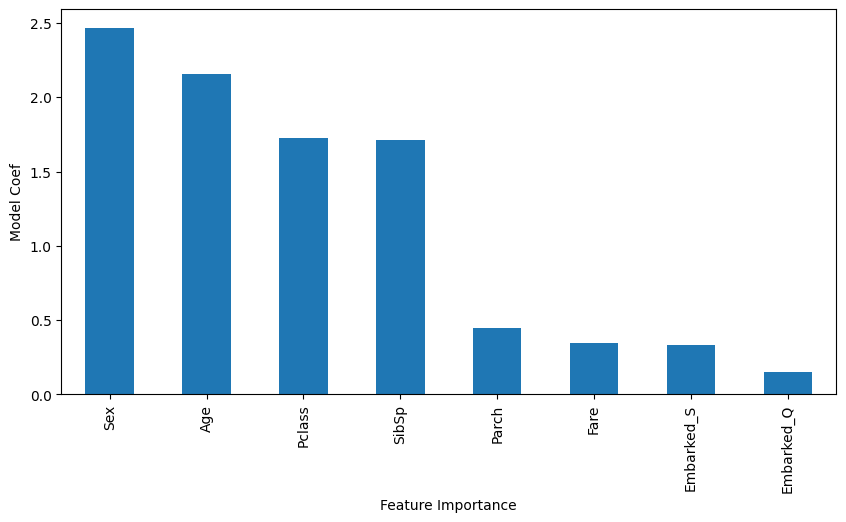

In [5]:
importance = pd.Series(np.abs(model.coef_.ravel()))
importance.index = X_train.columns

importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(10, 5))

plt.ylabel('Model Coef')
plt.xlabel('Feature Importance');

# Save the model

In [6]:
joblib.dump(model, 'model/LogisticRegression.joblib')

['model/LogisticRegression.joblib']